In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



In [ ]:
# Load and preprocess the dataset
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,)



In [ ]:
# Function to create and compile the model
def create_model(optimizer):
    model = Sequential([
        Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(15, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
# Function to train and evaluate the model
def train_and_evaluate(optimizer_name, optimizer):
    print(f"Training with {optimizer_name} optimizer...")
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, loss, accuracy



In [ ]:
# Compare Nesterov SGD and Adam
optimizers = {
    "Nesterov SGD": SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adam": Adam(learning_rate=0.001)
}

results = {}  #storing results

for name, optimizer in optimizers.items():
    history, loss, accuracy = train_and_evaluate(name, optimizer)
    results[name] = {
        "history": history,
        "loss": loss,
        "accuracy": accuracy
    }
#training and evaluating optimizers


Training with Nesterov SGD optimizer...
Training with Adam optimizer...


Text(0.5, 1.0, 'Loss vs. Epochs')

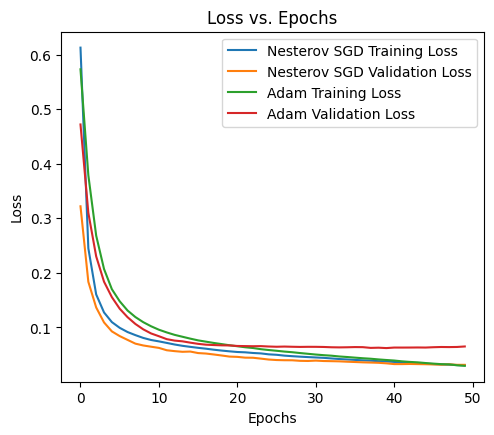

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 10))

# Plotting training and validation loss
plt.subplot(2, 2, 1)
for name, result in results.items():
    plt.plot(result["history"].history['loss'], label=f'{name} Training Loss')
    plt.plot(result["history"].history['val_loss'], label=f'{name} Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')




Final Results:
Nesterov SGD:
  Test Loss: 0.0342
  Test Accuracy: 0.9825
Adam:
  Test Loss: 0.0253
  Test Accuracy: 0.9912


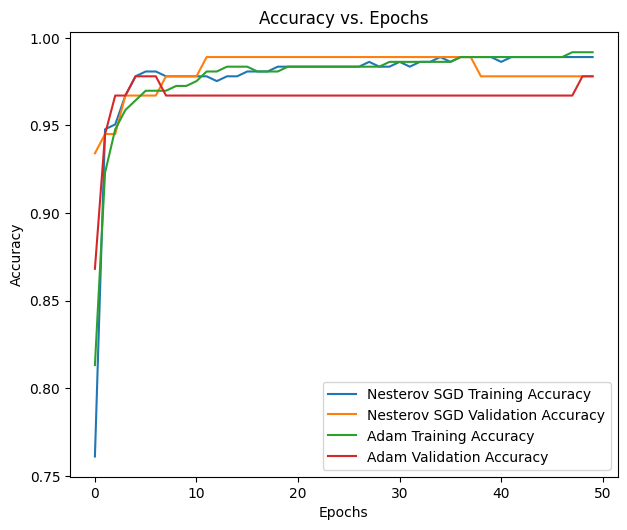

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 2)
for name, result in results.items():
    plt.plot(result["history"].history['accuracy'], label=f'{name} Training Accuracy')
    plt.plot(result["history"].history['val_accuracy'], label=f'{name} Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

# the final loss and accuracy for each optimizer
print("\nFinal Results:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Test Loss: {result['loss']:.4f}")
    print(f"  Test Accuracy: {result['accuracy']:.4f}")

plt.tight_layout()
plt.show()
